In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import matplotlib
matplotlib.style.use("dark_background")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# prevent the PDF from being clipped to the "figsize".
# NOTE: this is different than `plt.tight_layout()`
# despite the similar name.
matplotlib.rcParams['savefig.bbox'] = 'tight'

In [2]:
df = pd.read_csv("./data/sc.tsv", delimiter="\t")

In [3]:
print(df.columns)
df["year"] = df["Date"].apply(lambda x: int(str(x)[:4]))
df["n_cells"] = df["Reported cells total"].apply(
    lambda x: int(str(x).replace(",", "")) if type(x)==str else -1
)

Index(['Shorthand', 'DOI', 'Authors', 'Journal', 'Title', 'Date',
       'bioRxiv DOI', 'Reported cells total', 'Organism', 'Tissue',
       'Technique', 'Data location', 'Panel size', 'Measurement',
       'Cell source', 'Disease', 'Contrasts', 'Developmental stage',
       'Number of reported cell types or clusters', 'Cell clustering',
       'Pseudotime', 'RNA Velocity', 'PCA', 'tSNE', 'H5AD location',
       'Isolation', 'BC --> Cell ID _OR_ BC --> Cluster ID',
       'Number individuals'],
      dtype='object')


In [4]:
df = df.loc[df["n_cells"]!=-1]

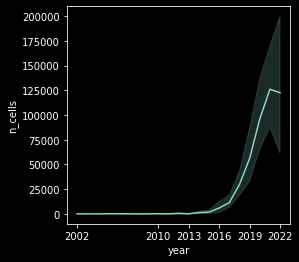

In [7]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))

sns.lineplot(
    data=df,
    x="year",
    y="n_cells",
    ax=ax,
)
ax.set_xticks([2002, 2010, 2013, 2016, 2019, 2022])

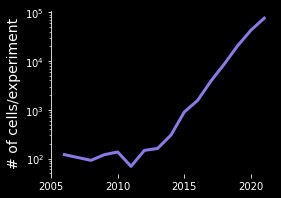

In [8]:
dfg = (
    df
    .loc[df["year"]<=2021]
    .groupby("year")
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(1,1, figsize=(4, 3))

ax.plot(
    dfg["year"],
    dfg["n_cells"].rolling(4).median(),
    linewidth=3,
    color="#897AE5",
)
for k in ("top", "right", "bottom"):
    ax.spines[k].set_visible(False)

ax.set_xticks([2005, 2010, 2015, 2020,])

ax.set_ylabel("# of cells/experiment", fontsize=14)
ax.set_yscale("log")
plt.savefig("./plots/cells_per_exp.pdf", transparent=True)

In [10]:
seq_df = pd.read_csv("./data/seq_costs.csv")
seq_df = seq_df.iloc[:-1]

seq_df.head()

,Date,Cost per Mb,Cost per Genome,Unnamed: 3
0,Sep-01,"$5,292.39","$95,263,072",NaN
1,Mar-02,"$3,898.64","$70,175,437",NaN
2,Sep-02,"$3,413.80","$61,448,422",NaN
3,Mar-03,"$2,986.20","$53,751,684",NaN
4,Oct-03,"$2,230.98","$40,157,554",NaN


In [11]:
months = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12",
}

seq_df["year"] = seq_df["Date"].apply(
    lambda x: int("20" + str(x).split("-")[1]),
)
seq_df["month"] = seq_df["Date"].apply(
    lambda x: int(months[str(x).split("-")[0]]),
)

seq_df["date"] = seq_df["year"].astype(str) + "-" + seq_df["month"].astype(str)

seq_df["cost"] = seq_df[" Cost per Mb "].apply(
    lambda x: float(str(x).replace("$","").replace(",",""))
)

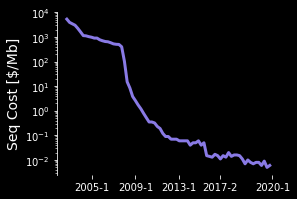

In [12]:
fig, ax = plt.subplots(1,1, figsize=(4, 3))

ax.plot(
    seq_df["date"],
    seq_df["cost"],
    linewidth=3,
    color="#897AE5",
)
for k in ("top", "right", "bottom"):
    ax.spines[k].set_visible(False)

ax.set_ylabel("Seq Cost [$/Mb]", fontsize=14)
ax.set_yscale("log")

ax.set_xticks(["2005-1", "2009-1", "2013-1", "2017-2", "2020-1"])
plt.savefig("./plots/seq_cost.pdf", transparent=True)

In [21]:
cost_cell = {
    "tech": ["Smart-seq2", "10x Chromium", "SPLiT-seq", "SHARE-seq", "PIP-seq"],
    "year": [2014, 2017, 2018, 2020, 2022],
    "cost": [83, 0.5, 0.1, 0.01, 0.01],
}

cell_df = pd.DataFrame(cost_cell)
cell_df = cell_df.iloc[:-1]
cell_df

,tech,year,cost
0,Smart-seq2,2014,83.00
1,10x Chromium,2017,0.50
2,SPLiT-seq,2018,0.10
3,SHARE-seq,2020,0.01


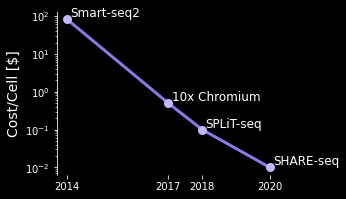

In [22]:
fig, ax = plt.subplots(1,1, figsize=(4, 3))

ax.plot(
    cell_df["year"],
    cell_df["cost"],
    linewidth=3,
    color="#897AE5",
)

ax.scatter(
    cell_df["year"],
    cell_df["cost"],
    linewidth=3,
    color="#C5B7FF",
    zorder=10,
    #edgecolors="white",
)

for k in ("top", "right", "bottom"):
    ax.spines[k].set_visible(False)

ax.set_ylabel("Cost/Cell [$]", fontsize=14)
ax.set_yscale("log")

for i in range(cell_df.shape[0]):
    name = cell_df.iloc[i]["tech"]
    x = float(cell_df.iloc[i]["year"])
    y = float(cell_df.iloc[i]["cost"])

    ax.text(x+0.1, y*1.15, name, fontsize=12)

ax.set_xticks(cell_df["year"].tolist())

plt.savefig("./plots/cell_cost.pdf", transparent=True)